In [2]:
import numpy as np
import pandas as pd

In [3]:
features = ['checking account balance', 'duration', 'credit history',
            'purpose', 'amount', 'savings', 'employment', 'installment',
            'marital status', 'other debtors', 'residence time',
            'property', 'age', 'other installments', 'housing', 'credits',
            'job', 'persons', 'phone', 'foreign']
target = 'repaid'
df = pd.read_csv('./data/german.data', sep=' ',
                     names=features+[target])

In [8]:
df.head()

,checking account balance,duration,credit history,purpose,amount,savings,employment,installment,marital status,other debtors,...,property,age,other installments,housing,credits,job,persons,phone,foreign,repaid
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking account balance    1000 non-null object
duration                    1000 non-null int64
credit history              1000 non-null object
purpose                     1000 non-null object
amount                      1000 non-null int64
savings                     1000 non-null object
employment                  1000 non-null object
installment                 1000 non-null int64
marital status              1000 non-null object
other debtors               1000 non-null object
residence time              1000 non-null int64
property                    1000 non-null object
age                         1000 non-null int64
other installments          1000 non-null object
housing                     1000 non-null object
credits                     1000 non-null int64
job                         1000 non-null object
persons                     1000 non-null int64
phone              

In [4]:
import matplotlib.pyplot as plt
numerical_features = ['duration', 'age', 'residence time', 'installment', 'amount', 'duration', 'persons', 'credits']
quantitative_features = list(filter(lambda x: x not in numerical_features, features))
X = pd.get_dummies(df, columns=quantitative_features, drop_first=True)
encoded_features = list(filter(lambda x: x != target, X.columns))

In [11]:
X.head()

,duration,amount,installment,residence time,age,credits,persons,repaid,checking account balance_A12,checking account balance_A13,...,property_A124,other installments_A142,other installments_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,phone_A192,foreign_A202
0,6,1169,4,4,67,2,1,1,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,2,1,0,...,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,1,0,0,...,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,2,0,0,...,1,0,1,0,1,0,1,0,0,0


In [5]:
# scale data
norm = 1/X.std()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# split in training and test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X*norm, df[target],
            test_size=0.2)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [9]:
model = KNeighborsClassifier(n_neighbors = 15).fit(Xtrain, ytrain)

In [10]:
ypred = model.predict(Xtest)
print(ypred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 2 1 2 2 1
 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 1 1
 1 1 1 2 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 1 1 1 1 1 2 1 1 2
 1 2 1 1 1 1 1 1 1 1 2 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 2 1 1 1 2 1 2 1 2]


In [11]:
print("Accuracy:", metrics.accuracy_score(ytest, ypred))

Accuracy: 0.895


In [12]:
k_range = range(1,100)
scores = {}
scores_list = []
for k in k_range:
    model1 = KNeighborsClassifier(n_neighbors=k)
    model1.fit(Xtrain, ytrain)
    ypred1 = model1.predict(Xtest)
    scores[k] = metrics.accuracy_score(ytest, ypred1)
    scores_list.append(metrics.accuracy_score(ytest, ypred1))

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy score')

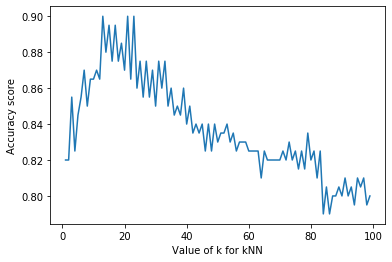

In [14]:
plt.plot(k_range, scores_list)
plt.xlabel('Value of k for kNN')
plt.ylabel('Accuracy score')

In [21]:
model1.score(Xtest, ytest)

0.8

In [38]:
predicted_probability = metrics.accuracy_score(ytest, ypred)
print(predicted_probability)

0.895


In [25]:
interest_rate = 0.005

In [26]:
gain = X['amount']*((1 + interest_rate)**(X['duration']) - 1)

In [46]:
expected_utility = ((gain*predicted_probability)-(X['amount']*(1-predicted_probability))).astype(int)
print(expected_utility)

0       -90
1       815
2      -104
3       816
4        42
5       643
6        24
7       493
8      -152
9       206
10      -64
11      590
12      -78
13       10
14      -49
15       11
16       21
17      318
18      110
19       30
20     -136
21     -205
22     -132
23      -89
24     -122
25     -106
26      -33
27      -20
28     -176
29     1416
       ... 
970     -53
971      65
972      10
973    1512
974     111
975      11
976     -58
977     -50
978      22
979     -44
980     330
981     664
982     -18
983     584
984      17
985     -50
986     651
987     -63
988      57
989      15
990    -177
991     -55
992     -40
993     281
994    -119
995     -86
996     152
997     -40
998     221
999     550
Length: 1000, dtype: int64


In [47]:
expected_utility[expected_utility > 0] = 1
expected_utility[expected_utility < 0] = 2
print(expected_utility)

0      2
1      1
2      2
3      1
4      1
5      1
6      1
7      1
8      2
9      1
10     2
11     1
12     2
13     1
14     2
15     1
16     1
17     1
18     1
19     1
20     2
21     2
22     2
23     2
24     2
25     2
26     2
27     2
28     2
29     1
      ..
970    2
971    1
972    1
973    1
974    1
975    1
976    2
977    2
978    1
979    2
980    1
981    1
982    2
983    1
984    1
985    2
986    1
987    2
988    1
989    1
990    2
991    2
992    2
993    1
994    2
995    2
996    1
997    2
998    1
999    1
Length: 1000, dtype: int64


In [50]:
actions = expected_utility

In [52]:
def test_decision_maker(Xtest, ytest, interest_rate, decision_maker):
    n_test_examples = len(Xtest)
    utility = 0

    ## Example test function - this is only an unbiased test if the data has not been seen in training
    for t in range(n_test_examples):
        action = decision_maker.get_best_action(Xtest.iloc[t])
        good_loan = ytest.iloc[t] # assume the labels are correct
        duration = Xtest['duration'].iloc[t]
        amount = Xtest['amount'].iloc[t]
        # If we don't grant the loan then nothing happens
        if (action==1):
            if (good_loan != 1):
                utility -= amount
            else:    
                utility += amount*(pow(1 + interest_rate, duration) - 1)
    return utility

TypeError: 'Series' object is not callable